Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The zip file '/content/drive/MyDrive/Content.zip' exists.

Zip file extracted successfully.

Checking training directory:
Directory: /content/Content/datasets/Content/datasets/train
Directory: /content/Content/datasets/Content/datasets/train/TB
Contains 360 files
Directory: /content/Content/datasets/Content/datasets/train/Normal
Contains 360 files
Directory: /content/Content/datasets/Content/datasets/train/CPA
Contains 360 files

Checking validation directory:
Directory: /content/Content/datasets/Content/datasets/val
Directory: /content/Content/datasets/Content/datasets/val/TB
Contains 120 files
Directory: /content/Content/datasets/Content/datasets/val/Normal
Contains 120 files
Directory: /content/Content/datasets/Content/datasets/val/CPA
Contains 120 files

Checking test directory:
Directory: /content/Content/datasets/Content/datasets/test
Directory: /conten

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
34/34 [==============================] - 12s 358ms/step - loss: 1.0134 - accuracy: 0.4852 - val_loss: 0.8854 - val_accuracy: 0.6083
Epoch 3/50
34/34 [==============================] - 13s 371ms/step - loss: 0.9759 - accuracy: 0.4991 - val_loss: 0.8426 - val_accuracy: 0.6417
Epoch 4/50
34/34 [==============================] - 12s 366ms/step - loss: 0.8906 - accuracy: 0.5759 - val_loss: 0.7503 - val_accuracy: 0.6222
Epoch 5/50
34/34 [==============================] - 13s 374ms/step - loss: 0.8804 - accuracy: 0.5620 - val_loss: 0.7527 - val_accuracy: 0.5667
Epoch 6/50
34/34 [==============================] - 12s 367ms/step - loss: 0.7780 - accuracy: 0.6528 - val_loss: 0.5957 - val_accuracy: 0.7278
Epoch 7/50
34/34 [==============================] - 11s 313ms/step - loss: 0.7115 - accuracy: 0.6907 - val_loss: 0.6400 - val_accuracy: 0.7361
Epoch 8/50
34/34 [==============================] - 11s 334ms/step - loss: 0.6756 - accuracy: 0.7176 - val_loss: 0.6119 - val_accuracy: 0.7139

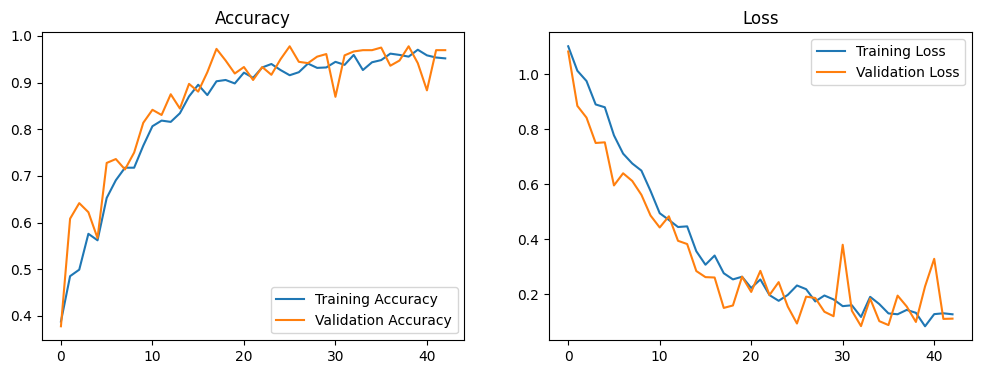

In [7]:
from google.colab import drive
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Content.zip'

# Define the directory where you want to extract the contents
extracted_dir = '/content/Content/datasets'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    print(f"The zip file '{zip_file_path}' exists.\n")

    # Check if the extraction directory exists
    if not os.path.exists(extracted_dir):
        print(f"The extraction directory '{extracted_dir}' does not exist.")
        print("Creating the directory...")
        os.makedirs(extracted_dir)
        print("Directory created successfully.\n")

    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
        print("Zip file extracted successfully.\n")

    # List the contents of the extraction directory
    # print("Contents of the extraction directory:")
    # for root, dirs, files in os.walk(extracted_dir):
    #     print(f"Directory: {root}")
    #     if files:
    #         print("Files:")
    #         for file in files:
    #             print(file)
    #     else:
    #         print("No files in this directory")
    #     print()
else:
    print(f"The zip file '{zip_file_path}' does not exist.")
    print("Please make sure the file exists and provide the correct path.")

# Define paths for the dataset
train_dir = os.path.join(extracted_dir, 'Content/datasets/train')
val_dir = os.path.join(extracted_dir, 'Content/datasets/val')
test_dir = os.path.join(extracted_dir, 'Content/datasets/test')

# Function to list directories and count images
def list_directories_and_count_images(path):
    for root, dirs, files in os.walk(path):
        print(f'Directory: {root}')
        if len(files) > 0:
            print(f'Contains {len(files)} files')

# Check the contents of each directory
print("Checking training directory:")
list_directories_and_count_images(train_dir)
print("\nChecking validation directory:")
list_directories_and_count_images(val_dir)
print("\nChecking test directory:")
list_directories_and_count_images(test_dir)

# Define ImageDataGenerators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',  # Change to categorical
                                                    color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',  # Change to categorical
                                                color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical',  # Change to categorical
                                                  color_mode='grayscale')

# Print the number of samples in each generator
print(f'Number of training samples: {train_generator.samples}')
print(f'Number of validation samples: {val_generator.samples}')
print(f'Number of test samples: {test_generator.samples}')

# Ensure that we have sufficient images to proceed with training
if train_generator.samples > 0 and val_generator.samples > 0 and test_generator.samples > 0:
    # Define the CNN model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Change to 3 units and softmax activation
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy',  # Change to categorical_crossentropy
                  optimizer='adam',
                  metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model.h5', save_best_only=True, monitor='val_loss')

    # Train the model
    history = model.fit(train_generator,
                        epochs=50,
                        validation_data=val_generator,
                        callbacks=[early_stopping, model_checkpoint])

    # Save the model
    model_path = '/content/drive/MyDrive/first_draft_classifier_v_14.h5'  # Replace with your desired path
    model.save(model_path)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test accuracy: {test_acc:.2f}')

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

else:
    print("Please ensure that your dataset directories contain images and try again.")


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Content.zip'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    print(f"The zip file '{zip_file_path}' exists.\n")

    # Define the directory where you want to extract the contents
    extracted_dir = '/content/Content/datasets'

    # Check if the extraction directory exists
    if os.path.exists(extracted_dir):
        print(f"The extraction directory '{extracted_dir}' exists.\n")
        # List directories and their contents
        print("Existing directories and their contents")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The zip file '/content/drive/MyDrive/Content.zip' exists.



In [11]:
# Assuming you have a data generator named train_generator
print("Class Indices:")
print(train_generator.class_indices)


Class Indices:
{'CPA': 0, 'Normal': 1, 'TB': 2}


In [2]:
from google.colab import files
from IPython.display import Image

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/first_draft_classifier_v_14.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Rescale pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Upload an image in real-time
uploaded = files.upload()

# Process uploaded images
for filename in uploaded.keys():
    print(f"Predictions for {filename}:")
    # Preprocess the uploaded image
    preprocessed_image = preprocess_image(filename)

    # Make predictions
    predictions = model.predict(preprocessed_image)

    # Get class labels
    class_labels = ['CPA', 'Normal', 'TB']  # Replace with your class labels

    # Display the uploaded image
    display(Image(filename))

    # Display predictions
    for i, prob in enumerate(predictions[0]):
        print(f"{class_labels[i]}: {prob}")

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]
    predicted_class_prob = predictions[0][predicted_class_index]
    threshold = 0.85  # Define the threshold probability


    # Check if the predicted class probability is greater than or equal to the threshold
    if predicted_class_prob >= threshold:
        # Predicted class with sufficient confidence
        predicted_class_label = class_labels[predicted_class_index]
    else:
        # Predicted class with insufficient confidence
        predicted_class_label = 'None'
    print("Predicted class:", predicted_class_label)


NameError: name 'tf' is not defined